<a href="https://colab.research.google.com/github/gktmdl/Undergraduate/blob/%EC%83%9D%EB%AA%85%EA%B3%BC%ED%95%99%EC%8B%A4%ED%97%98-%EB%B0%8F-%EA%B5%90%EC%9C%A1-1/%EC%83%9D%EB%AA%85%EA%B3%BC%ED%95%99%EC%8B%A4%ED%97%98_%EB%B0%8F_%EA%B5%90%EC%9C%A1_1_%EA%B0%9C%EC%9D%B8_%EB%85%BC%EB%AC%B8_%EA%B3%84%EC%82%B0_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = '/content/NanumGothic.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

In [2]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키


# 나눔글꼴 설치 및 적용
!apt-get -qq install fonts-nanum
fe = fm.FontEntry(
    fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # 설치된 폰트 경로
    name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

# 마이너스 기호 깨짐 문제 해결
plt.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
import scipy

In [4]:
import matplotlib

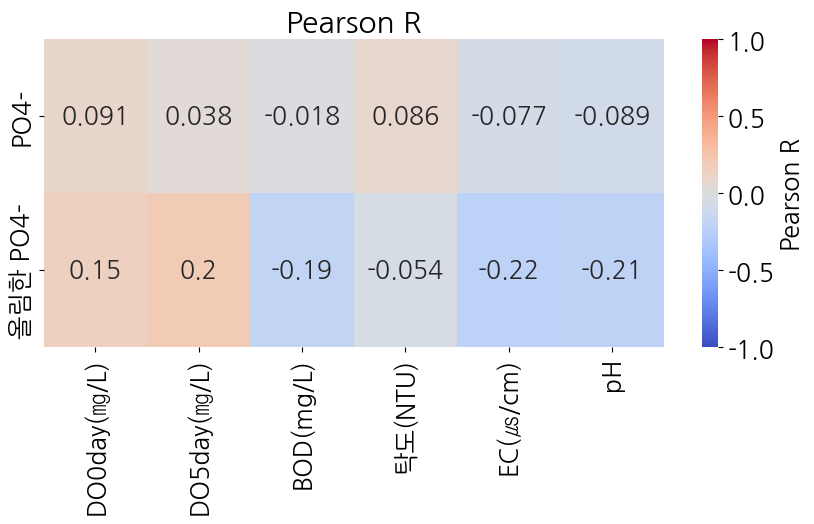

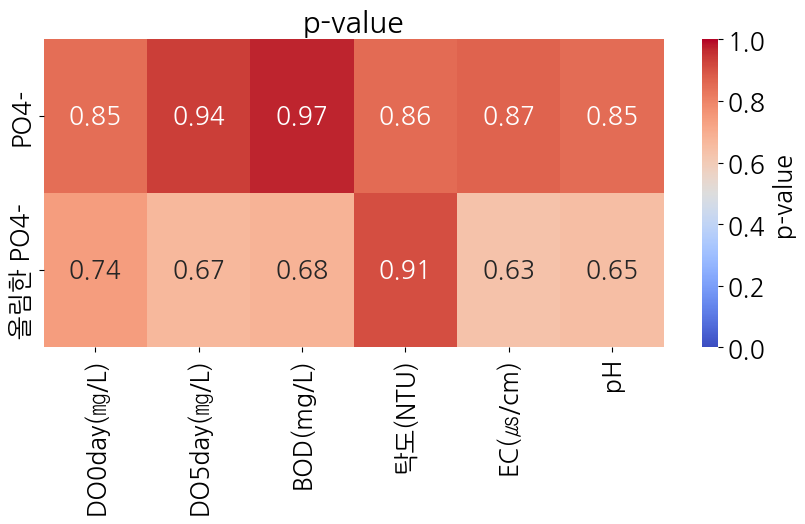

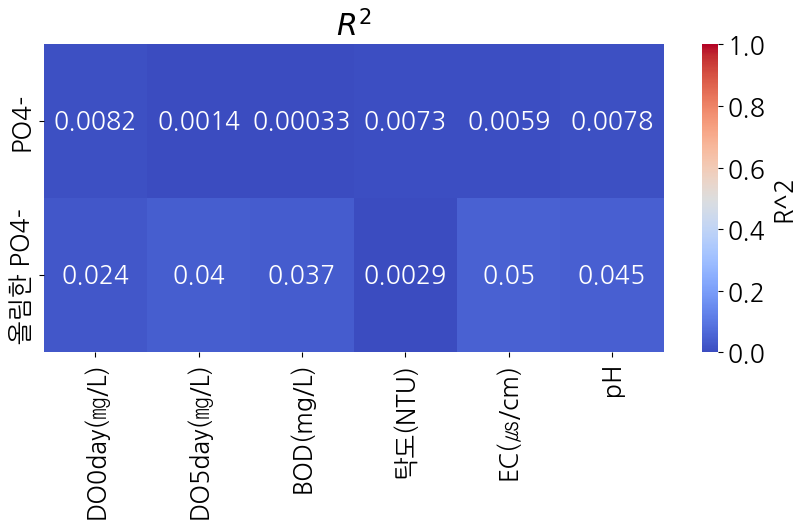

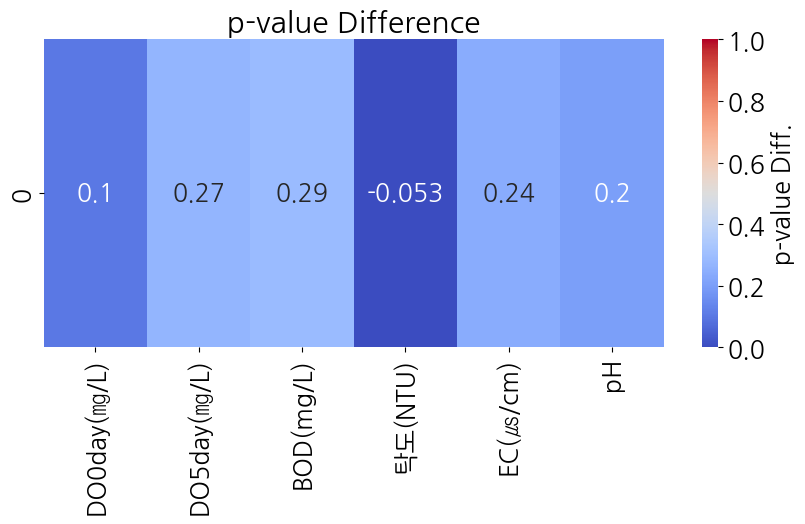

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 데이터 설정
datas = {
    'DO0day(㎎/L)': [4.57, 4.39, 4.57, 4.57, 4.62, 4.63, 4.44],
    #'DO0day 측정 시 온도(℃)': [21.6, 21.8, 21.7, 22.3, 21.8, 21.7, 21.9],
    'DO5day(㎎/L)': [4.67, 4.28, 4.22, 4.46, 4.52, 4.81, 3.67],
    #'DO5day 측정 시 온도(℃)': [21.5, 22.1, 22.4, 22.5, 22.5, 22.2, 21.4],
    'BOD(mg/L)': [-0.1, 0.11, 0.35, 0.11, 0.1, -0.18, 0.77],
    '탁도(NTU)': [0.51, 0.97, 1.31, 1.34, 0.99, 0.67, 2.31],
    'EC(㎲/cm)': [37.0, 39.9, 42.7, 13.39, 10.69, 17.08, 93.3],
    'pH': [7.53, 7.6, 7.45, 6.16, 6.16, 6.22, 7.85],
    'PO4-': [0.005, -0.002, -0.001, 0.008, -0.001, -0.003, 0.001],
    '올림한 PO4-': [0.005, 0, 0, 0.008, 0, 0, 0.001]
}

# 데이터프레임 생성
df = pd.DataFrame(datas)

# 상관계수, p-값, 결정계수 계산
target_vars = ['PO4-', '올림한 PO4-']
other_vars = [col for col in df.columns if col not in target_vars]

corr_data = []
pval_data = []
r2_data = []

for target in target_vars:
    corrs = []
    pvals = []
    r2s = []
    for var in other_vars:
        corr, pval = pearsonr(df[target], df[var])
        corrs.append(corr)
        pvals.append(pval)
        r2s.append(corr**2)  # 결정계수 계산
    corr_data.append(corrs)
    pval_data.append(pvals)
    r2_data.append(r2s)

# 데이터프레임으로 변환
corr_df = pd.DataFrame(corr_data, index=target_vars, columns=other_vars)
pval_df = pd.DataFrame(pval_data, index=target_vars, columns=other_vars)
r2_df = pd.DataFrame(r2_data, index=target_vars, columns=other_vars)

# 상관계수 히트맵
plt.figure(figsize=(10, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Pearson R'})
plt.title('Pearson R')
plt.show()

# p-값 히트맵
plt.figure(figsize=(10, 4))
sns.heatmap(pval_df, annot=True, cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'p-value'})
plt.title('p-value')
plt.show()

# 결정계수 히트맵
plt.figure(figsize=(10, 4))
sns.heatmap(r2_df, annot=True, cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'R^2'})
plt.title('$R^2$')
plt.show()

# delta_p 계산
delta_p = pval_df.loc['PO4-'] - pval_df.loc['올림한 PO4-']

# delta_p 히트맵 시각화
plt.figure(figsize=(10, 4))
sns.heatmap(delta_p.to_frame().T, annot=True, cmap='coolwarm', vmin=0, vmax=1, cbar_kws={'label': 'p-value Diff.'})
plt.title('p-value Difference')
plt.show()
